In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

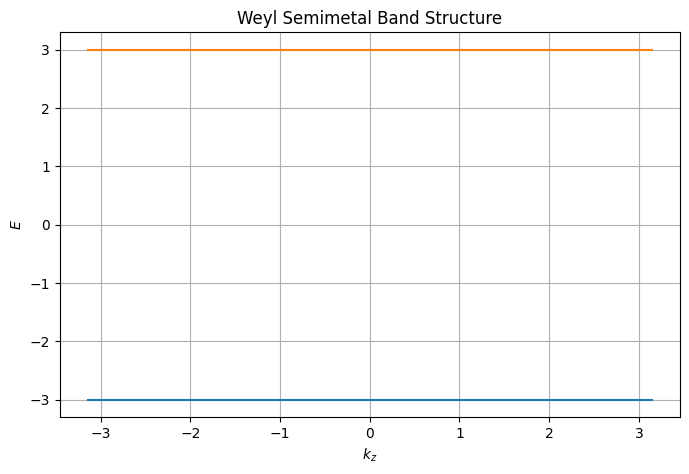

In [7]:
# Weyl Semimetal band structure

# Parameters
t0, t, V=0, 0, 3
Nk = 1001

kz_vals = np.linspace(-np.pi, np.pi, Nk)
kx, ky = 0,0

# Hamiltonian and diagonalization
energies = []
for kz in kz_vals:
    Hk = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.sin(ky)) * sigma_y + (2*t*np.cos(kz)+2*t*(2-np.cos(kx)-np.cos(ky))-V)* sigma_z
    eigvals = np.linalg.eigvalsh(Hk)
    energies.append(eigvals)

energies = np.array(energies).T

# Plot
plt.figure (figsize=(8,5))
for E in energies:
    plt.plot(kz_vals, E)
plt.xlabel('$k_z$')
plt.ylabel('$E$')
plt.title('Weyl Semimetal Band Structure')
plt.grid(True)
plt.show()


In [4]:
chern_n = []
t0, t, V = 0, 1, 3

Nk = 99

kx_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)
ky_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)

kz = 0

energies = []
# Compute eigenvectors on grid
eigvecs = np.zeros((Nk, Nk, 2), dtype=complex)
for i in range(Nk):
    for j in range(Nk):
        kx, ky = kx_vals[i], ky_vals[j]
        Hk = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.sin(ky)) * sigma_y + (2*t*np.cos(kz)+2*t*(2-np.cos(kx)-np.cos(ky))-V)* sigma_z
        _, evecs = np.linalg.eigh(Hk)
        eigvecs[i, j, :] = evecs[:, 0]  # Lower band

# Compute Berry curvature F for this m
F = np.zeros((Nk - 1, Nk - 1))
for i in range(Nk - 1):
    for j in range(Nk - 1):
        u = eigvecs[i, j]
        u_x = eigvecs[i + 1, j]
        u_y = eigvecs[i, j + 1]
        u_xy = eigvecs[i + 1, j + 1]

        Ux = np.vdot(u, u_x)
        Uy = np.vdot(u, u_y)
        Uxy = np.vdot(u_x, u_xy)
        Uyx = np.vdot(u_y, u_xy)

            # Normalize link variables to unit magnitude (pure phase)
        Ux /= np.abs(Ux)
        Uy /= np.abs(Uy)
        Uxy /= np.abs(Uxy)
        Uyx /= np.abs(Uyx)

        F[i, j] = np.angle(Ux * Uxy * np.conj(Uyx) * np.conj(Uy))

    # Compute Chern number
chern = np.sum(F) / (2 * np.pi)

print ("chern number is:", chern)

chern number is: 0.9975047677090583


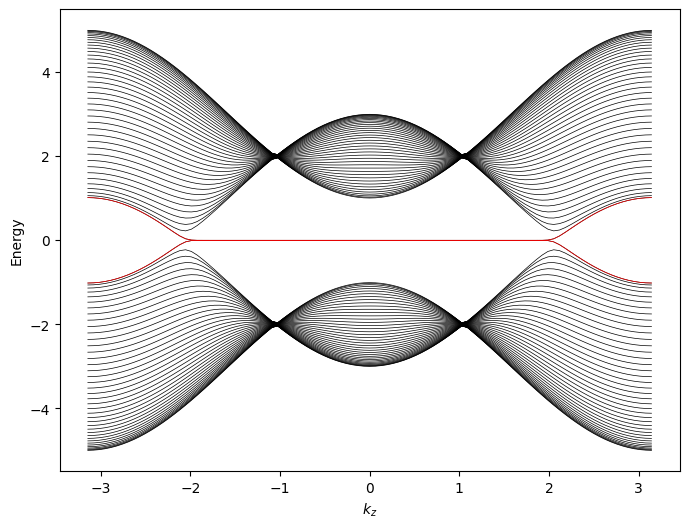

In [5]:
#Periodic-open

#Parameters
L = 40
t0, t, V=0, 1, 3

kzs = np.linspace(-np.pi,np.pi, 99)
kx = 0

#Hamiltonian and diagonalization
eigvals_oc_vs_kz = []
for kz in kzs:
    H0 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(2-np.cos(kx))-V)* sigma_z
    V0 = -1j*t * sigma_y +t*sigma_z
    
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_kz.append(eigenvals_oc)

eigvals_oc_vs_kz = np.array(eigvals_oc_vs_kz).T

#Plot
plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_kz:
    plt.plot(kzs, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, eigvals_oc_vs_kz[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_z$')
plt.ylabel('Energy')
plt.show()


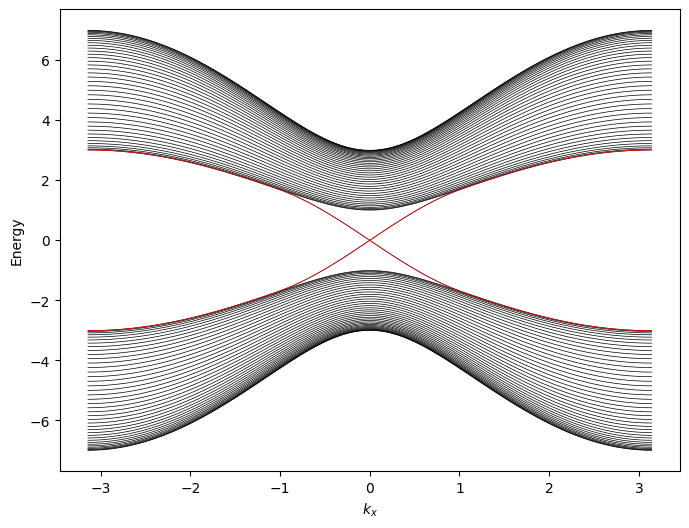

In [6]:
#Edge modes

# Parameters
L = 40
t0, t, V = 0,1,3

kz = 0
kxs = np.linspace(-np.pi,np.pi, 99)


eigvals_oc_vs_kx = []

# Hamiltonian
for kx in kxs:
    H0 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(2-np.cos(kx))-V)* sigma_z
    V0 = -1j*t * sigma_y +t*sigma_z
    
    # Diagonalization 
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_kx.append(eigenvals_oc)

eigvals_oc_vs_kx = np.array(eigvals_oc_vs_kx).T

#Plot
plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_kx:
    plt.plot(kxs, band, color='black', linewidth=0.5)

mid = L
for b in [mid-1, mid]:
    plt.plot(kxs, eigvals_oc_vs_kx[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.show()
